In [57]:
import tensorflow as tf
print ('Tensorflow version is', tf.__version__)

Tensorflow version is 1.4.0


## create dataset

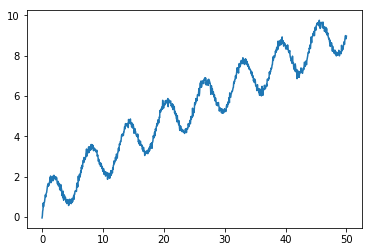

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_size = 1000
x = np.linspace(0, 50, data_size).astype(np.float32)
noise = np.random.normal(loc = 0, scale = 0.1, size = (data_size))

y = np.sin(x) + 0.6*x**0.5 + x/10 + noise
y = y.astype(np.float32)

%matplotlib inline
plt.plot(x, y)

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

## build deep learning prediction interval

In [69]:
import tensorflow as tf

batch_size = 1

## define the neural network
X = tf.placeholder(tf.float32, shape=(1, batch_size))
Y = tf.placeholder(tf.float32, shape=(1, batch_size))

# Network Parameters
n_hidden_1 = 20 # 1st layer number of neurons
n_hidden_2 = 20 # 2nd layer number of neurons
n_hidden_3 = 20

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.truncated_normal([batch_size, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_3, 1]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'out': tf.Variable(tf.truncated_normal([1]))
}

# Create model
def neural_net(x):
    # Hidden fully connected layer with 20 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Hidden fully connected layer with 20 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
    # Output fully connected layer with a neuron
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer

## define loss function
y_model = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.square(y_model - Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(loss_op)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
loss_trace = []
y_pred = np.zeros(shape = (len(x_test)))
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(500):
        
        total_loss = 0
        num_batch = int(len(y_train)/batch_size)
        
        for (x, y) in zip(x_train, y_train):
            # Run optimization op (backprop)
            #rand_ind = np.random.randint(len(x_train), size = batch_size)
            #batch_x, batch_y = x_train[rand_ind], y_train[rand_ind]
            _, loss = sess.run([train_op, loss_op], feed_dict={X: np.reshape(x, (-1, batch_size)), 
                                                               Y: np.reshape(y, (-1, batch_size))})
            total_loss += loss
            
        loss_trace.append(total_loss)
        print("Optimization Finished!", total_loss)
    
    for i in range(len(x_test)):
        y_pred[i] = sess.run(y_model, feed_dict = {X: np.reshape(x_test[i], (-1, batch_size))})

Optimization Finished! 8684.42091638103
Optimization Finished! 1283.9689423099592
Optimization Finished! 2046.9657280167007
Optimization Finished! 2173.579979506595
Optimization Finished! 1929.6628931465443
Optimization Finished! 2075.7775331795
Optimization Finished! 1796.0527867519354
Optimization Finished! 1842.7502958008445
Optimization Finished! 1756.4359960073689
Optimization Finished! 1756.5746670293843
Optimization Finished! 1737.9777209142471
Optimization Finished! 1660.9617399523559
Optimization Finished! 1626.3733510853012
Optimization Finished! 1606.0377546899792
Optimization Finished! 1549.4854677657029
Optimization Finished! 1506.443597646543
Optimization Finished! 1460.4848192291538
Optimization Finished! 1430.6518100443955
Optimization Finished! 1371.829723276159
Optimization Finished! 1337.693416272432
Optimization Finished! 1369.940646998511
Optimization Finished! 1244.990852530554
Optimization Finished! 1238.6192787822229
Optimization Finished! 1210.8364891816539
Opt

Optimization Finished! 355.64464485138524
Optimization Finished! 356.4887026385771
Optimization Finished! 354.8768407649441
Optimization Finished! 355.4298799880755
Optimization Finished! 355.53119298631395
Optimization Finished! 355.1965312545999
Optimization Finished! 355.8973931399058
Optimization Finished! 355.5884141495967
Optimization Finished! 355.41567306858394
Optimization Finished! 355.2463105738923
Optimization Finished! 355.44741493116544
Optimization Finished! 355.291509941851
Optimization Finished! 354.70256836284716
Optimization Finished! 355.2048380887959
Optimization Finished! 355.86154066538694
Optimization Finished! 354.5887810599032
Optimization Finished! 354.8354519983683
Optimization Finished! 355.04432142993534
Optimization Finished! 354.6101084346474
Optimization Finished! 354.6131792501262
Optimization Finished! 354.42452860558706
Optimization Finished! 355.00199789216646
Optimization Finished! 354.727704746691
Optimization Finished! 355.1318121437681
Optimizat

Optimization Finished! 346.8133170413099
Optimization Finished! 346.63205736004375
Optimization Finished! 347.19425411148654
Optimization Finished! 346.5955204879527
Optimization Finished! 347.48016785787775
Optimization Finished! 346.21810125788073
Optimization Finished! 347.24759111262404
Optimization Finished! 346.3777164955544
Optimization Finished! 346.07547515339303
Optimization Finished! 348.02348647232964
Optimization Finished! 346.8416000269606
Optimization Finished! 347.2164240297921
Optimization Finished! 346.4933946521417
Optimization Finished! 346.5081670223568
Optimization Finished! 346.62547141471987
Optimization Finished! 346.0745354976176
Optimization Finished! 346.1689068062569
Optimization Finished! 346.8058548071117
Optimization Finished! 347.45433189143796
Optimization Finished! 346.30064767284125
Optimization Finished! 347.48208164248996
Optimization Finished! 346.31430766307244
Optimization Finished! 346.1717084319608
Optimization Finished! 346.51885831789605
Opt

Optimization Finished! 336.80249100199825
Optimization Finished! 336.68967458488737
Optimization Finished! 336.60609612264307
Optimization Finished! 336.0555170887759
Optimization Finished! 336.4906038684782
Optimization Finished! 336.261993353087
Optimization Finished! 336.47863880340094
Optimization Finished! 336.16845628551033
Optimization Finished! 336.057300303823
Optimization Finished! 335.795662769331
Optimization Finished! 336.1188103890536
Optimization Finished! 336.06194801999254
Optimization Finished! 335.72394342043714
Optimization Finished! 336.19251645886607
Optimization Finished! 335.7932659653691
Optimization Finished! 335.74541016561375
Optimization Finished! 335.5402981699092
Optimization Finished! 336.0568883472622
Optimization Finished! 335.6643918681287
Optimization Finished! 335.3147140155284
Optimization Finished! 335.14964398893045
Optimization Finished! 335.14694227654417
Optimization Finished! 335.13923897612017
Optimization Finished! 340.2406911565713
Optimiz

Optimization Finished! 330.73102105743766
Optimization Finished! 330.70683294757805
Optimization Finished! 330.6991099667649
Optimization Finished! 330.74315020420966
Optimization Finished! 330.73750029998587
Optimization Finished! 330.57653513190996
Optimization Finished! 330.6167666880667
Optimization Finished! 330.58095475576556
Optimization Finished! 330.58580794142887
Optimization Finished! 330.6184034994358
Optimization Finished! 330.53438045145094
Optimization Finished! 330.6306759820648
Optimization Finished! 330.4502199282598
Optimization Finished! 330.5737415867401
Optimization Finished! 330.4743812837331
Optimization Finished! 330.38603179861025
Optimization Finished! 330.48415989258524
Optimization Finished! 330.46283428402796
Optimization Finished! 330.42053670488855
Optimization Finished! 330.36418988670266
Optimization Finished! 330.4437844052852
Optimization Finished! 330.2272105226411
Optimization Finished! 330.3492017119408
Optimization Finished! 330.345299756318
Opti

Optimization Finished! 326.26324162195544
Optimization Finished! 326.2055004161142
Optimization Finished! 326.2764701152952
Optimization Finished! 326.2870643551901
Optimization Finished! 326.23405337729884
Optimization Finished! 326.20874305365714


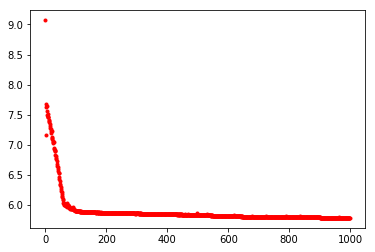

In [70]:
plt.plot(np.log(loss_trace), 'r.')

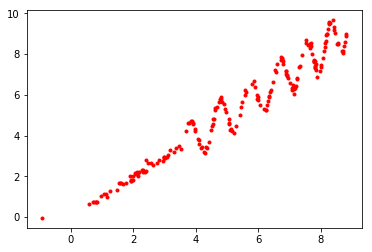

In [71]:
plt.plot(y_pred, y_test, 'r.')